# Classification Indian Liver Disease using SVM method

Data source : https://www.mldata.io/dataset-details/indian_liver_patient/

<h3>Nama : M. Daffa Badran Thoriq</h3>
<h3>NIM : 09011181823012</h3>
<h3>UAS Artificial Intelligence</h3>

<h3>Project Task</h3>
<p>In this study, my task is to classify Liver disease inside patient from the state of Andhra Pradesh's body using Support Vector Machine (SVM), and reduce the features dimensions to 2D with PCA (Principal Component Analysis)</p>

<h3>Attribute Details</h3>

| Name | Type | Description |
|---|---|---|
| age | integer | Age of the patient in years |
| gender | string | Patient Gender : Male or Female |
| TB | float | Total Bilirubin |
| DB | float | Direct Bilirubin |
| alkphos | float | Alkaline Phosphotase |
| sgpt | float | Alamine Aminotransferase |
| sgot | float | Aspartate Aminotransferase |
| TP | float | Total Proteins |
| ALB | float | Albumin |
| A_G | float | Ratio of Albumin and Globulin |
| class | float | Predictor Class : 1 if patient has Liver Disease and 2 if they do not |

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

%matplotlib inline

## Load Dataset

In [2]:
liver = pd.read_csv('indian_liver_patient_weka_dataset.csv')
liver.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


## Encode the column with string type values in dataset

<p>Since we have gender column which have values' type is string, we need to parse it to number first to make computer know the data. We will use pd.get_dummies() to separate 'Male' and 'Female' into their own column which only accept 1 and 0</p>

In [3]:
liver_encoded = pd.get_dummies(liver)

In [4]:
# Before encoded
liver.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [5]:
# After encoded
liver_encoded.head()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class,gender_Female,gender_Male
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,1,0
1,62,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,0,1
2,62,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,0,1
3,58,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,0,1
4,72,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,0,1


<br><br>

## Principal Component Analysis (PCA)

<p>In this case, we will use PCA to reduce the 11 Features to be 2D Features to make it easier to visualized (plot)</p>

### Separate the features and the classifier (class)

In [6]:
features = ['age','TB', 'DB','alkphos', 'sgpt', 'sgot', 'TP', 'ALB', 'A_G', 'gender_Female', 'gender_Male']
# Separating out the features
x = liver_encoded.loc[:, features].values 
# Separating out the class
y = liver_encoded.loc[:,['class']].values 

In [7]:
# Visualize the features values
print(x)

[[65.    0.7   0.1  ...  0.9   1.    0.  ]
 [62.   10.9   5.5  ...  0.74  0.    1.  ]
 [62.    7.3   4.1  ...  0.89  0.    1.  ]
 ...
 [52.    0.8   0.2  ...  1.    0.    1.  ]
 [31.    1.3   0.5  ...  1.    0.    1.  ]
 [38.    1.    0.3  ...  1.5   0.    1.  ]]


In [8]:
# Visualize the class values
print(y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

### Standardize the Data

Standardize is an algorithm to scale the features in our data before applying PCA. Scikit-learn have preprocessing features, one of them called StandardScaler. With StandardScaler, we can standardize the dataset's features onto unit scale (mean = 0 and variance = 1)

In [9]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
print(x)

[[ 1.25209764 -0.41887783 -0.49396398 ...  0.08311146  1.76228085
  -1.76228085]
 [ 1.06663704  1.22517135  1.43042334 ...  0.08309208 -0.56744644
   0.56744644]
 [ 1.06663704  0.6449187   0.93150811 ...  0.08311025 -0.56744644
   0.56744644]
 ...
 [ 0.44843504 -0.4027597  -0.45832717 ...  0.08312358 -0.56744644
   0.56744644]
 [-0.84978917 -0.32216906 -0.35141677 ...  0.08312358 -0.56744644
   0.56744644]
 [-0.41704777 -0.37052344 -0.42269037 ...  0.08318415 -0.56744644
   0.56744644]]


## PCA Projection to 2D

<p>The original data has 11 columns features. In this section, we will reduce the original data which is 11 dimensional to 2 dimensions</p>

In [10]:
from sklearn.decomposition import PCA
# We will reduce 11 dimensional to 2 dimensions, so use n_components = 2
pca = PCA(n_components=2)
# transform the features data with PCA
principalComponents = pca.fit_transform(x)
# The 2 dimensions columns named 'principal component 1' and 'principal component 2'
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

In [11]:
# We concat (merge) the 2 dimensions features with class column
finalDf = pd.concat([principalDf, liver_encoded[['class']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2  class
0                -1.758791               1.204523    1.0
1                 1.681554               0.388892    1.0
2                 1.038123              -0.160383    1.0
3                -0.421375              -1.035348    1.0
4                 0.490894              -1.026572    1.0
..                     ...                    ...    ...
578               0.694501              -1.606805    2.0
579              -0.379868              -1.145238    1.0
580              -0.187998              -1.028237    1.0
581              -0.485777              -0.654053    1.0
582              -0.988188              -0.354304    2.0

[583 rows x 3 columns]


## Visualize 2D Features Projection

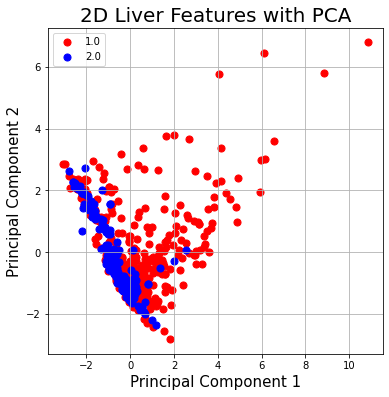

In [12]:
# import matplotlib.pyplot as plt
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D Liver Features with PCA', fontsize = 20)
targets = [1.0, 2.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

<br><br>

## We get our new data

<p>After we use PCA, we get our new data transform. So we will use this PCA data to classify the class using SVM model</p>

In [13]:
finalDf.head()

,principal component 1,principal component 2,class
0,-1.758791,1.204523,1.0
1,1.681554,0.388892,1.0
2,1.038123,-0.160383,1.0
3,-0.421375,-1.035348,1.0
4,0.490894,-1.026572,1.0


## Separate training and testing data

In [14]:
# Choose all features columns except class column 
X = finalDf.drop(['class'], axis =1)
X.head()

,principal component 1,principal component 2
0,-1.758791,1.204523
1,1.681554,0.388892
2,1.038123,-0.160383
3,-0.421375,-1.035348
4,0.490894,-1.026572


In [15]:
# Choose class column to be classifier
Y = finalDf['class']
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: class, dtype: float64

In [16]:
# Separate the training and testing data with 90% data training and 10% data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [17]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output features) is', Y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', Y_test.shape)

The size of our training "X" (input features) is (524, 2)


The size of our testing "X" (input features) is (59, 2)


The size of our training "y" (output features) is (524,)


The size of our testing "y" (output features) is (59,)


## Visualize our training data

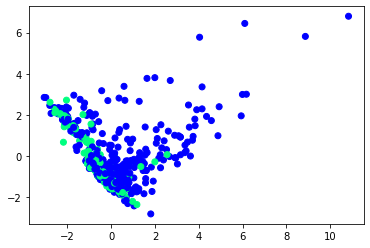

In [18]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=Y_train, cmap=
           'winter')

## Visualize our testing data

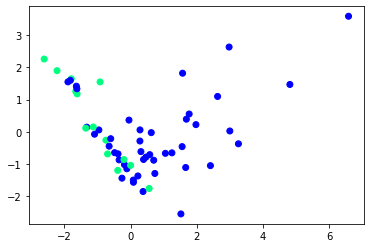

In [19]:
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=Y_test, cmap=
           'winter')

## Import SVM model

In [20]:
# kernel will be rbf for default, we can modify the kernel name, C, gamma etc
svc_model =  SVC(kernel='linear')

In [21]:
# Train our SVM model with our training dataset
svc_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [22]:
# our trained model to make prediction using our testing data
Y_predict = svc_model.predict(X_test)

## Check classifier accuracy on test data using Confusion Matrix, Accuracy Score and Classification Report

The confusion matrix is a table representing the performance of your model to classify labels correctly.

**A confusion matrix for a binary classification task:**

|   | Actual Positive | Actual Negative |   
|---|---|---|
|**Predicted Positive**  | True Positive (TP)  | False Positive (FP)  | 
|**Predicted Negative** | False Negative (FN)  | True Negative (TN)  |  

In a binary classifier, the "true" class is typically labeled with 1 and the "false" class is labeled with 0. 

> **True Positive**: A positive class observation (1) is correctly classified as positive by the model.

> **False Positive**: A negative class observation (0) is incorrectly classified as positive.

> **True Negative**: A negative class observation is correctly classified as negative.

> **False Negative**: A positive class observation is incorrectly classified as negative.

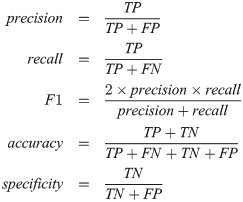

In [23]:
# Use confusion matrix
cm = np.array(confusion_matrix(Y_test, Y_predict))
confusion = pd.DataFrame(cm, index=['Predicted Liver Disease', 'Predicted Healthy'],
                         columns=['Actual Liver Disease','Actual Healthy'])
confusion

,Actual Liver Disease,Actual Healthy
Predicted Liver Disease,45,0
Predicted Healthy,14,0


In [24]:
# Check accuracy score with data testing
print(accuracy_score(Y_test, Y_predict))

0.7627118644067796


In [26]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

         1.0       0.76      1.00      0.87        45
         2.0       0.00      0.00      0.00        14

    accuracy                           0.76        59
   macro avg       0.38      0.50      0.43        59
weighted avg       0.58      0.76      0.66        59

